<div style="width: 100%; max-width: 100%; background-color: #f0f0f0; border: 2px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h2 style="color: #18453B; text-align: center;">Homework 04: Imputation</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    This HW is lighter than others to allow you to complete your project. Only 40 points total. 
  </p>
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

Belieu, Joshua Alan;

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 1: Test of MCAR Missingness (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    A crucial first step before imputation is testing for the quality/mechanism of missingness. We typically start with a test for MCAR since that might be the easiest to repair, perhaps using a deletion method. Although we have mentioned this many times in the lecture, we have not actually discussed how to do it. 
    The plan for this HW problem is for you to learn and implement highly simplifed versions of two methods: the Expectation-Maximization (EM) and Little's MCAR Test methods. In the the real-world you would use libraries (https://pypi.org/project/missingpy/) for these, and not use a simplified approach, but then you would also not know what you are doing. This HW shows you what these methods are doing so that you can intelligently use full libraries. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Write Python code that reads the iris dataset.</li>
    <li>Make a heatmap of the correlation marix of the four numeric input features; this is the ground truth.</li>
    <li>Pick a column (e.g., `sepal width`) and randomly replace the values with `NaN`.</li>
    <li>Make a new heatmap and compare it with the original.</li>
    <li>Find the mean and variance of the (remaining) values in that column.</li>
    <li>Sample a normal distribution function with that mean and variance and create a new, fixed data matrix. This is the first step in the EM method: in a full implementation you would iterate new versions until convergence. 
    <li>Make yet a new heatmap. Note that you imputed in the previous (simplified) EM step completely at random: you literally used a random number generator with no bias. 
    <li>Compare the imputed-data heatmap to the heatmap from the data with missing values. Did the imputation, done completely at random,  change the correlation structure? This is the essence of Little's MCAR Test: the missing values are assumed to be MCAR, so you fill them accordingly and then see if that assumption is reasonable. (The Little Test is normally cast as a hypothesis test with a p value.) 
    <li>Once your have a working code, play with various choices and write down what you see. That is, change the column, change the percentage missing, etc. 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects. 
  </ul>

  I will give you some helper code to start with! If you use it, add detailed comments.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

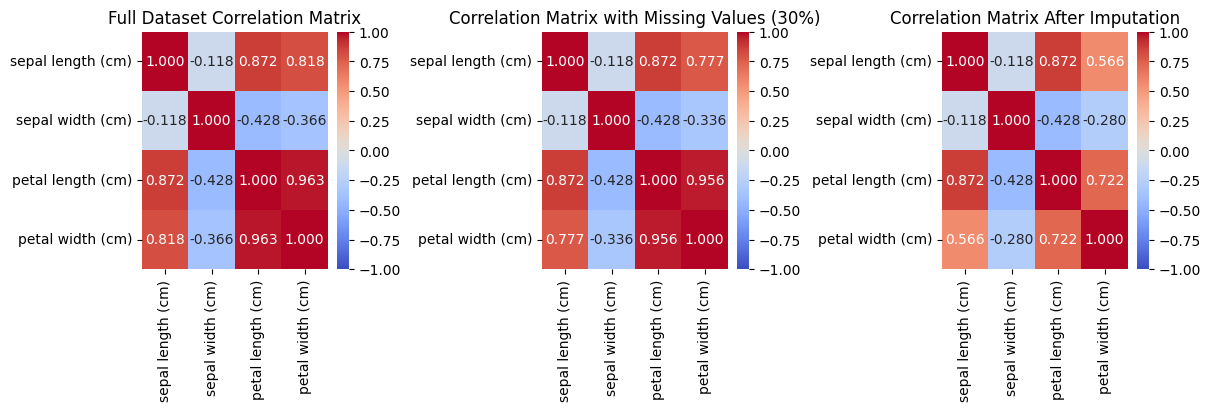

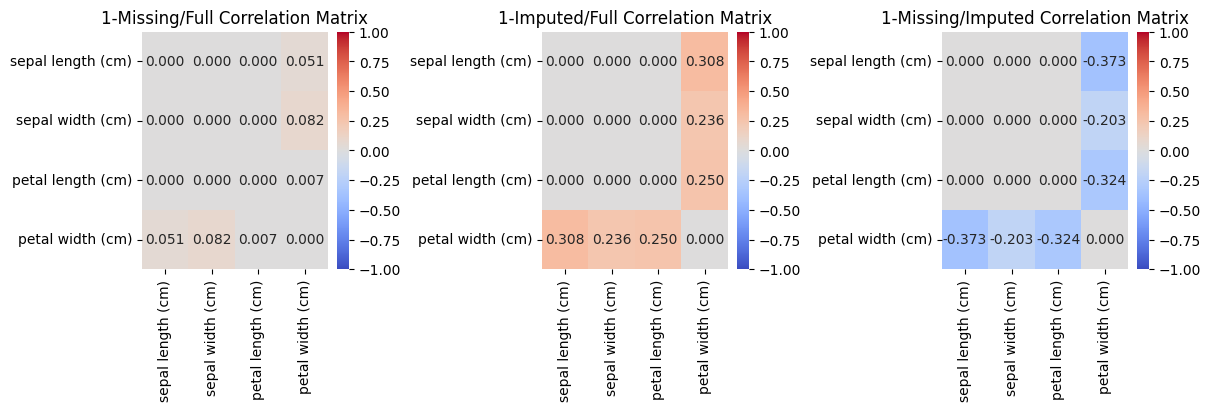

In [64]:

# imported libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# load in the data and convert it to a pandas df
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# plot the correlation heatmap
def plot_heatmap(dataframe, title,ax=None):
    '''
    a heatmap plotting routine. given a df and title, calculate the pearson 
    coefficients for a dataset and plot it as a heat map. I added an ax parameter
    to support plotting on a subplot. annot puts labels on the plot, cmap is the
    color scheme, vmin/max set the mapping between values and the cmap. fmt is
    how the values in the box are represented, 'a float with 3 decimals'.
    '''
    sns.heatmap(dataframe.corr(), annot=True,ax=ax, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")
    ax.set_title(title)
    # plt.show()

# missing values in one column (sepal width)
def introduce_missingness_in_column(dataframe, column, missing_rate=0.3):
    df_missing = dataframe.copy() # create a copy of the df. we dont want to change the original!
    '''
    mask, or boolean mask, will be a list of bools. rand(df_missing.shape[0])
    will generate a list of random numers on [0,1). the inequality will convert
    the random list of values, 'is an element of this random list < missing_rate?'
    '''
    mask = np.random.rand(df_missing.shape[0]) < missing_rate
    '''
    grab the desired column and replace any corresponding value in that column
    with nan if it is true in the mask.
    '''
    df_missing.loc[mask, column] = np.nan
    return df_missing
missing_col = 'petal width (cm)'

df_missing = introduce_missingness_in_column(df, missing_col, missing_rate=0.3)

# mean and variance of remaining values in 'sepal width'
mean_val = df_missing[missing_col].mean()
std_val = df_missing[missing_col].std()

# impute missing values using randn (Poor Man's EM)
'''
check sepal width for nans. return a list of bools where an entry that IS nan
is True (and vice versa).
'''
missing_indices = df_missing[missing_col].isna()
df_imputed = df_missing.copy() # another copy, dont overwrite data!
'''
generate a random ndarray (interval [0,1)) of length equal to the number of nans
in the column. perform a linear transformation of these random values my scaling
by the variance of the column with the mean as the intercept. finally, at the
sepal width column, replace any nans with these values.
'''
df_imputed.loc[missing_indices, missing_col] = np.random.randn(missing_indices.sum()) * std_val + mean_val

df_full = df.corr()
df_miss = df_missing.corr()
df_imp = df_imputed.corr()

# 1 row and 3 column subplot.
fig,axs = plt.subplots(1,3,figsize=(12,4),constrained_layout=True);
# full dataset correlation heatmap
plot_heatmap(df, "Full Dataset Correlation Matrix",ax=axs[0]);
# heatmap with missing values
plot_heatmap(df_missing, "Correlation Matrix with Missing Values (30%)",ax=axs[1]);
# heatmap after imputation
plot_heatmap(df_imputed, "Correlation Matrix After Imputation",ax=axs[2]);

fig1,axs1 = plt.subplots(1,3,figsize=(12,4),constrained_layout=True);

sns.heatmap(1-df_miss/df_full,ax=axs1[0], annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")
axs1[0].set_title('1-Missing/Full Correlation Matrix')
sns.heatmap(1-df_imp/df_full,ax=axs1[1], annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")
axs1[1].set_title('1-Imputed/Full Correlation Matrix')
sns.heatmap(1-df_miss/df_imp,ax=axs1[2], annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")
axs1[2].set_title('1-Missing/Imputed Correlation Matrix');

✏️ **Answer:** Put your reflections here

I think I came up with a nifty way to look at the effect of missingness and imputing. I take one minus the ratio of to correlation matrices. In doing this we can make a comparison and see the effect of missingness/imputing in a dataset. I do this betweenthe missing and full correlation matrices, the imputed and full, and the missing and imputed correlation matrices. In forming this ratio I do not believe we can consider the coefficients as correlation coefficients anymore. The values would be more akin to "sensitivity" coefficients which detail the response of the correlations between the features.

sepal width : 

There is not much response in comparing Missing to Full (M/F). The highest effect is seen in the sensitivity between sepal width and length. For the comparison of Imputed to Full (I/F) these is mich stronger reaction in which we see a general positive sensitivity between all features' correltions with sepal widt. The comparison with Missing and Iputed (M/I) shows the strongest reaction where we see a negative sensitivity in all correlations with sepal width.

sepal length :

M/F - Again, no strong reaction is seen here. Sepal width and length show the highest sensitivity which is still <-.01

I/F - Similar to sepal width. Middling positive sensitivity in all features, except sepal width interestingly.

M/I - Similar to sepal with. The strongest sensitivity that is negative, exept sepal width interestingly.

petal length : 

Similar reports to sepal length. I suspect this is an artifact of the imputation method but what can we expect from other, more robust, imputation methods?

petal width :

Similar reports to sepal width except it seems here that the magnitude of I/F and M/I are now comparable. In earlier comparisons we saw that M/I was typically > I/F.

Advice :

When facing missing data do some tests to identify what kind of missingness you have. This will inform how you should deal with the missingness.

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 2: Correlations and MAR Missingness (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Next, we will do the same set of steps as in the previous problem, but now for MAR. To make this easy, you will use almost everything you just did in the previous problem. That is, use the iris dataset, make correlation heatmaps, and so on. The difference is that you will not create the missing values radnomly but according to some pattern in another column. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy your code from problem 1 to here and get ready to modify it.</li>
    <li>Pick a column to add missing values to.</li>
    <li>Add the missing values, `np.nan`, to the column based on values in one of the other columns. You can do this however you want, but an easy way to start is by creating missing values when the value in another column is above a certain value.</li>
    <li>Again, compare correlation heatmaps for a few choices (e,g,m columns, missingness rules, etc.).</li>
    <li>How did the correlation heatmap change for this MAR case compared with the MCAR case? 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects.</li>
  </ul>

  Yes, I will give you some background and code to start with! AS always, comment it if you use any of it.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

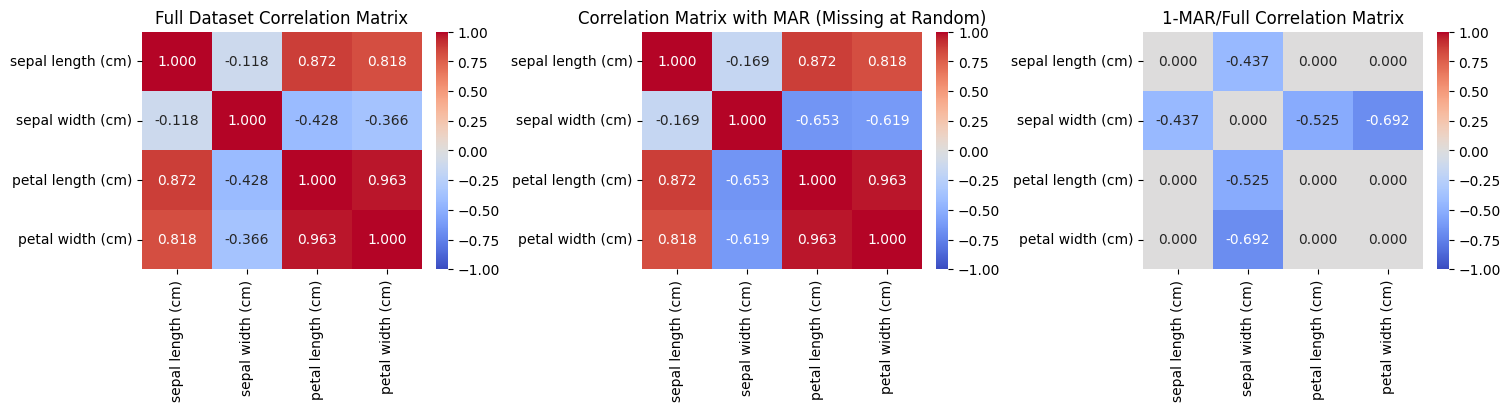

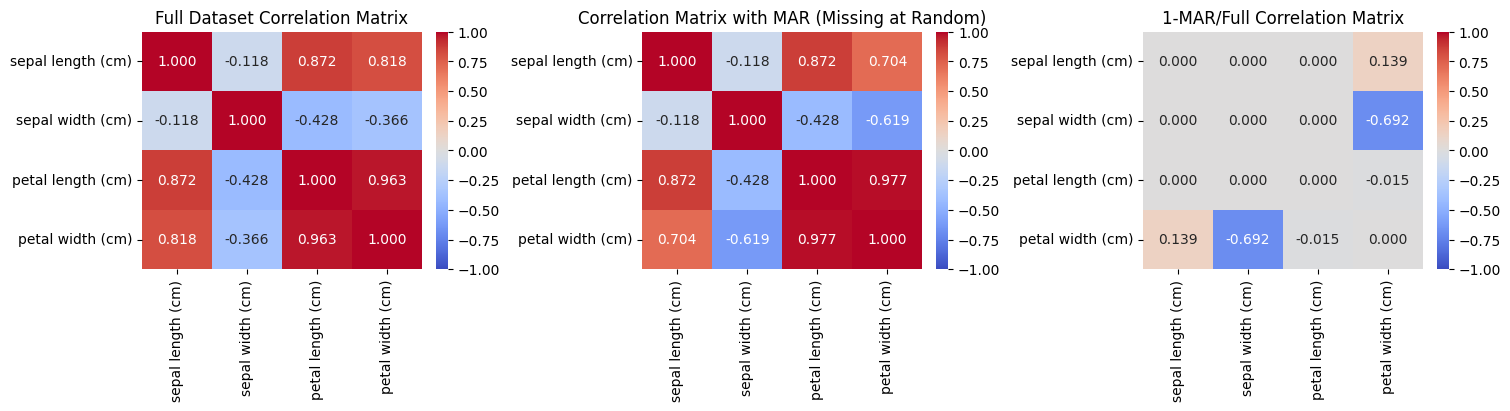

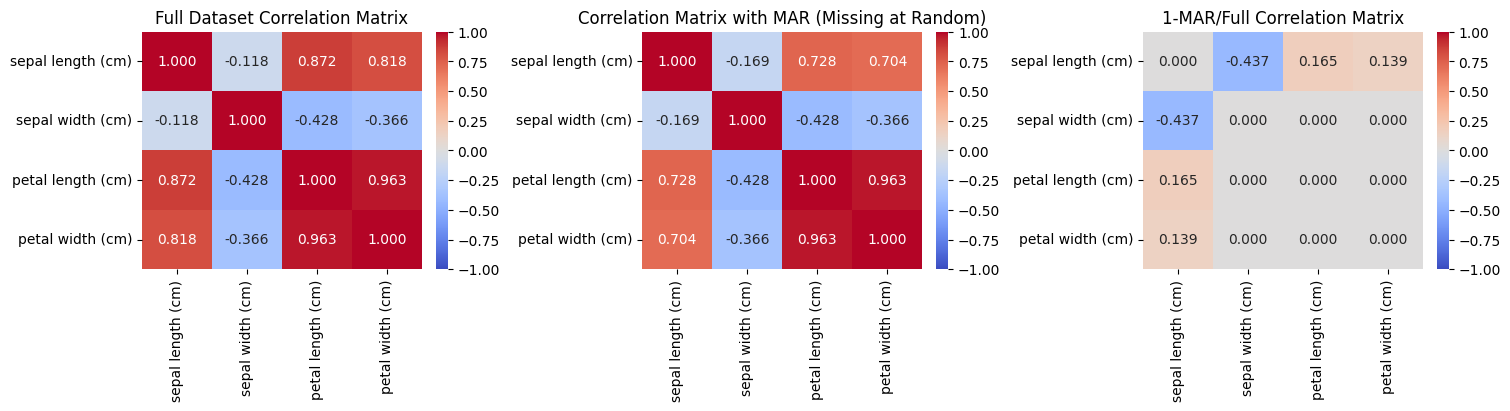

In [23]:
### ANSWER
# imported libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
# load in dataset and convert to pandas df
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# plot the correlation heatmap
def plot_heatmap(dataframe, title,ax=None):
    '''
    a heatmap plotting routine. given a df and title, calculate the pearson 
    coefficients for a dataset and plot it as a heat map. I added an ax parameter
    to support plotting on a subplot. annot puts labels on the plot, cmap is the
    color scheme, vmin/max set the mapping between values and the cmap. fmt is
    how the values in the box are represented, 'a float with 3 decimals'.
    '''
    sns.heatmap(dataframe.corr(), annot=True,ax=ax, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")
    ax.set_title(title)
    # plt.show()
# MAR: Make 'sepal width' missing based on 'petal length'
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold):
    '''
    dataframe : pandas df. the dataframe we want to introduce missingness to.
    column_to_remove : str. the feature we want to remove data from.
    reference_column : str. the feature we want to look at when considering
    whether or not we want to remove data.
    threshold : float. the value which sets the tolerance for whether or not to
    remove data.
    '''
    # make a copy of the df. we dont want to accidently change the original!
    df_mar = dataframe.copy()
    
    # 'petal length' is above the threshold
    ## this is a boolean mask which reads, 'make a list of bools that reflect
    # whether or not values in the refernce column are larger than the passed
    # threshold.
    mask = df_mar[reference_column] > threshold
    
    # add missing values in 'sepal width' where 'petal length' is above the threshold
    ## access the column we want to remove data from and where these values correspond
    # to Trues in the mask, replace the values with NaNs.
    df_mar.loc[mask, column_to_remove] = np.nan
    return df_mar # output the MAR-ed df!

missing_list = ['sepal width (cm)','petal width (cm)','sepal length (cm)']

for mis_col in missing_list :

    # set 'petal length' threshold for MAR
    df_mar = introduce_MAR(df, mis_col, 'petal length (cm)', threshold=4.5)

    df_mar_corr = df_mar.corr()
    df_full_corr = df.corr()

    comp = 1-df_mar_corr/df_full_corr

    fig,axs = plt.subplots(1,3,figsize=(15,4),constrained_layout=True);

    # heatmap with MAR
    plot_heatmap(df_mar, "Correlation Matrix with MAR (Missing at Random)",ax=axs[1])
    plot_heatmap(df, "Full Dataset Correlation Matrix",ax=axs[0])
    sns.heatmap(comp,ax=axs[2], annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")
    axs[2].set_title ( '1-MAR/Full Correlation Matrix' );


✏️ **Answer:** Put your reflections here

Inter-MAR Comparison : 

I made use of the "sensitivity matrix" that I introduced in the last problem again. From these matrices we can see that petal width has a strong effect on the correlation of sepal width with other features. The next strongest change is seen in sepal length where we see that the petal features did not react as strongly as the sepal width. Petal width showed a strong sensitivity with sepal width.

MAR and MCAR Comparison : 

From my sensitivity matrices I see that MCAR sensitivity is more "regular". That is, the magnitude of the values in each sensitivity matrix were of a much more similar magnitude than what we see in the case of MAR sensitivity matrices. We see that in the MAR sensitivity matrices that the elements can be of similar magnitude but that is not always the case.

Advice :

When wondering if a set of data is MAR or MCAR consider running some 'sensitivity tests' to see how regular the sensitivity of the dataset is to missing data.

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 3: MAR Test (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Yet again, you will use the same codes from above. In problem 2 you explored MAR bit didn't actually perform a test. Let's create MAR data and create a test. As mentioned in the lecture, we can do this by creating an "indicator" variable. (This was the variable "R" in the missingness diagrams.) Again, we'll do this in a simple way so that you truly see it. In the real world you would use a machine learning classifier for this, but that isn't necessary to understand the MAR test itself. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy the MAR code over.</li>
    <li>Add a column to the dataframe that is either 0, not missing, or 1, missing.</li>
    <li>To test for MAR, we need to see if those 0's and 1's are correalted with values in one of the other columns.</li>
    <li>Perform that test. (Do this however you wish; it is you who needs to be convinced.)</li>
    <li>Describe what you see. Keep in mind that you used known correlations to create the MAR version of the dataset in the first place, so your test should be quite clear.</li>
  </ul>

  I will give you some background and code to start with! Don't look at it unless you plan to completely comment it! 
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

Correlation between 'sepal width missing' and 'petal length': 0.792
P-value: 0.000


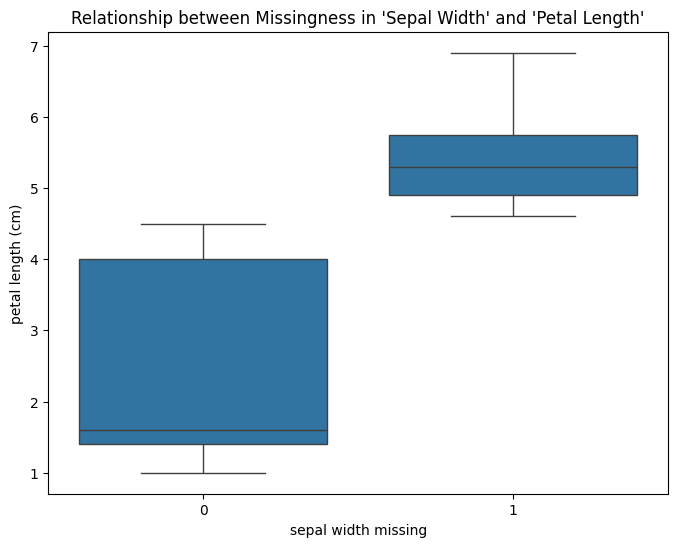

In [24]:
### ANSWER

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import pearsonr

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 1. Introduce MAR: Make 'sepal width' missing based on 'petal length'
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold):
    df_mar = dataframe.copy()
    
    # Rows where 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold
    
    # Introduce missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan
    return df_mar

# Set 'petal length' threshold for MAR
df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=4.5)

# 2. Add an indicator column for missingness in 'sepal width'
df_mar['sepal width missing'] = df_mar['sepal width (cm)'].isna().astype(int)

# 3. Check for correlation between 'sepal width missing' and 'petal length'
correlation, p_value = pearsonr(df_mar['sepal width missing'], df_mar['petal length (cm)'])

print(f"Correlation between 'sepal width missing' and 'petal length': {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.boxplot(x='sepal width missing', y='petal length (cm)', data=df_mar)
plt.title("Relationship between Missingness in 'Sepal Width' and 'Petal Length'")
plt.show()

✏️ **Answer:** Put your reflections here

---
## <font color=#18453B> Problem #4 Update on Your Project (10 pts) </font>

![missing](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)

By now you should have decided on the main topic of your project and the data that is going to be used to inform it. (If not, do that now!)
Your project is due at midnight, **October 19.**

For this HW, answer these questions:
1. clearly articulate the goal of your project (this goal might not be reached until the second half of the semester, of which half will be done by the midterm)
2. what are the datasets you plan to use?
3. describe the data: will you need to use, for example, encoding of any kind? 
4. what is your IDA strategy? 
5. list the detailed steps of your EDA strategy
6. are there imbalances in your dataset? how will you handle this? 
7. give a detailed account of your visualization plan, including why you made the choices you did 
8. all of this will end up in a Streamlit app: describe your planned layout and logic behind it




✏️ **Answer:** Put your answers here

1. Can we use experimental nuclear data from a completely data science perspective to understand or predict nuclei and nuclear properties? I hope to use symboic regression to predict binding energy of nuclei in terms of features I have access too. I also hope to investigate the efficacy of using measurment error in linear interpolation to generate data within a relativel sparse dataset.

2] I plan to use the AME2020 and AME2016 data sets. These datasets are separated by four years and feature different nuclei measurments and improvements in the measurements themselves. I also plan to use of a charge radius data set.

3] The dat consists of neutron, proton, and nucleon numbers, binding energy per nucleon, mass excess, element designation, beta decay energy, beta decay mode, atomic mass, and charge radius. Some of these values also come with uncertainties. No encoders come with the data but I think some intuitive encoders would be parity and isospin asymmetry. The former will signify if the proton and neutrons numbers are even or not. The latter will characterize nuclei in terms of relatively how many more protons that are to neutrons.

4] The preprocessing was atrocious. For some reason the scientists who took the AME data did not decide to dump all of the data into a csv but went with a fixed with file format which means I spent a few hours tuning how the file was read in. The cherry on top is that the 2020 and 2016 files do not share the exact same fixed with format so I get to do it all over again. Also, the AME people included special markers for theoretical uncertainties instead of adding a new column so I will have to address that if I include them in the plots. Finally, I see that the nuclei between the charge radius and AME files do not have great overlap and I will have to make sure they "sync up" properly when making plots. I have done this via their nucleon number and element designation.

5] Initially, I will throw all numerical features into a pairplot and see if there are any interesting looking monovariate or bivariate correlations. I think it would also be cool to show a correlation coefficient plot. If I can figure it out I would like to do some PCA.

6] I do not know what imbalances strictly means but I will assume it will mean relative data quantity between data sets. I will "sync up" the data sets to make sure I am plotting the correct data points. Other than that, I will use the synced data sets together and perform some kind of regression analysis to see if I can make predictions for data that is not included in one data set.

7] I think versatility is key here. For example, the pair plot. I would like to provide check boxes that changes the settings of the pair plot so one can see hitograms, bar plots, scatter plots, contour plots, etc.. This allows the user to look at as much as they can and maybe see something from all of the varietals. Another example would be possibly doing a regression plot where I add sliders which effect coefficients or powers of features in the plot to see what happens as one plays with them.

8] If I can add pages to the app then I think I would want an info page which details the features lightly and gives insights to the physics behind them. Then, one could progress to other tabs and see the pair plot, regression plots, and other fun things I haven't put here or thought of on the other tabs.

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.